# Project: Barber shop simulation
### Stu. name: Amirali Khatib
### Prof. name: Dr.Mohammad Ranjbar

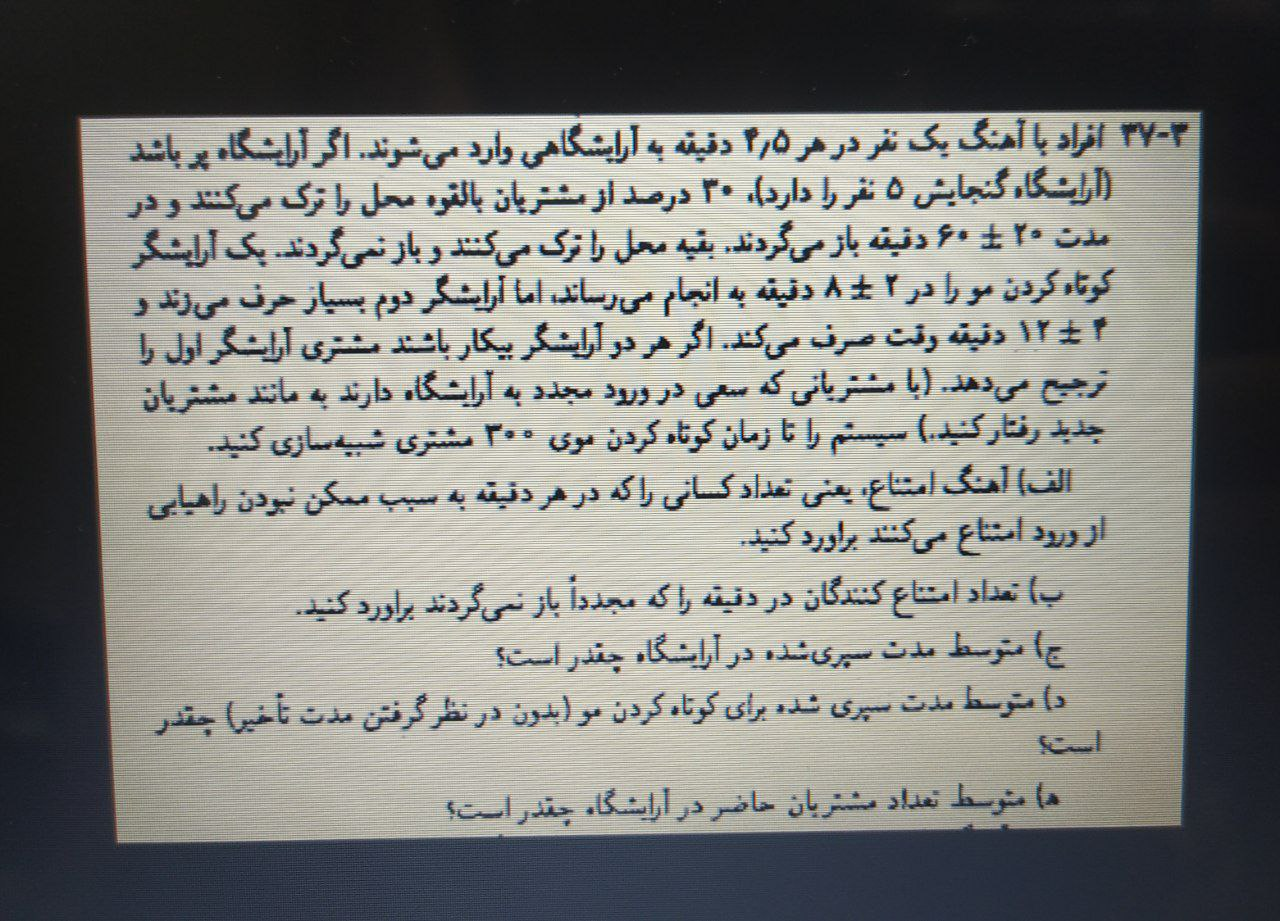

**Problem:**

Every **4.5 minutes**, one customer enter a barber shop.The capacity of barbershop is **5 customers** (these are the ones who are waiting for their turn in a queue). if the barber shop capacity is full, 30 percent of the customers will leave the place and return after $t_{1} = Uniform(40, 80)$  minutes. The other 70 percent leave the place and don't return. There are 2 barbers who give service to the customers. The service duration value for **barber_1** is $t_{2} = Uniform(6,10)$ minutes and the value of this attribute for the **barber_2** is $t_{3} = Uniform(8,16)$ minutes. if the barbers are both free, the customer prefer the **barber_1** to cut his hair. Simulate this system until the time that 300 customers are entirely given service.

**Note:** Treat both of the customers that return to the place and the ones who newly want to enter the barber shop equally. 

We want to find these value through simulation:
* Number of refuse to enter due to the full capacity in barber shop.
* Number of refuse to enter due to the full capacity in barber shop. (without return)
* Time that a customer spend in barbershop on average
* Average of service time duration for each customer
* Average of customer number in barber shop

In [1]:
import numpy as np

In [2]:
# initialization
n_costumer = int(input('Enter number of costumer: '))
n = 0 # current number of costumer 
current_time = 0
queue = 0  # number of costumer in queue --> {0,1,2,3}
b1,b2 = (0,0) # barbers status (busy(1) or free(0))
refuse = 0  # number of costumers who refuse to enter
refuse_no_return = 0  # number of costumer who refused to enter and didn't return again 
enter_time , finish_time = (None,None)
etl1 = []
etl2 = []
ftl = []
FEL = []
time_history = []
time_history.append(0)
costumer_number = []
costumer_number.append(0)

def present_costumer(queue, b1, b2):
    return queue+b1+b2

FEL.append((0,'a'))

Enter number of costumer: 150


In [3]:
def barber1():
    global current_time, FEL, etl2
    service_time = float(np.random.uniform(6,10,1))
    FEL.append((current_time + service_time , 'd1'))
    FEL.sort()
    etl2.append(current_time)
    return None

def barber2():
    global current_time, FEL, etl2
    service_time = float(np.random.uniform(8,16,1))
    FEL.append((current_time + service_time , 'd2'))
    FEL.sort()
    etl2.append(current_time)
    return None   

In [4]:
def arrival():
    global n, n_costumer, current_time, queue, refuse, refuse_no_return, FEL
    global enter_time, finish_time, etl1, etl2, ftl, b1, b2
    
    FEL.append((current_time + 4.5 , 'a'))
    FEL.sort()
    
    if len(etl1) < n_costumer:    
        if queue < 3:
            etl1.append(current_time)
            if b1 == 0:
                b1 = 1
                costumer_number.append(present_costumer(queue,b1,b2))
                time_history.append(current_time)
                barber1()
            elif b1 == 1:
                if b2 == 0:
                    b2 = 1
                    costumer_number.append(present_costumer(queue,b1,b2))
                    time_history.append(current_time)
                    barber2()
                elif b2 == 1:
                    queue += 1
                    #print('queue: ',queue)
                    costumer_number.append(present_costumer(queue,b1,b2))
                    time_history.append(current_time)
            
        elif queue == 3:
            refuse += 1
            choice = float(np.random.uniform(0,1,1))
            if choice <= 0.3:
                return_time = float(np.random.uniform(40,80,1))
                FEL.append((current_time + return_time, 'a'))
                FEL.sort()
            elif choice > 0.3:
                refuse_no_return += 1

    
    elif len(etl1) == n_costumer:
        pass
    
    return None

In [5]:
def departure(d_type):
    global n, n_costumer, current_time, queue, refuse, refuse_no_return, FEL
    global enter_time, finish_time, etl1, etl2, ftl, b1, b2
    n += 1
    ftl.append(current_time)
    
    if d_type == 'd1':
        if queue > 0:
            b1 = 1
            queue -= 1
            costumer_number.append(present_costumer(queue,b1,b2))
            time_history.append(current_time)
            barber1()
        elif queue == 0:
            b1 = 0
            costumer_number.append(present_costumer(queue,b1,b2))
            time_history.append(current_time)
   
    elif d_type == 'd2':
        if queue > 0:
            if b1 == 1:
                b2 = 1
                queue -= 1
                costumer_number.append(present_costumer(queue,b1,b2))
                time_history.append(current_time)
                barber2()
            elif b1 == 0:
                b2 = 0
                b1 = 1
                queue -= 1
                costumer_number.append(present_costumer(queue,b1,b2))
                time_history.append(current_time)
                barber1()
        elif queue == 0:
            b2 = 0 
            costumer_number.append(present_costumer(queue,b1,b2))
            time_history.append(current_time)
    
    return None

In [6]:
while n < n_costumer:
    current_time, event_type = FEL.pop(0)
    if event_type == 'a':
        arrival()
    elif (event_type == 'd1') | (event_type == 'd2'):
        departure(event_type)  

## Simulation report

In [7]:
print('=====report for barbery queue service=====\n')
print('number of customers: ', n)
print('total time: ', current_time)
print('refuse per minute: ', refuse/current_time,'refuse/min')
print('refuse (without return) per minute: ', refuse_no_return/current_time, 'refuse/min')
print('average total time duration which costumers spend in barber shop: ',np.mean(np.array(ftl)-np.array(etl1)))
print('average of  time duration from when the service started to its end: ',np.mean(np.array(ftl)-np.array(etl2)))
avg_present = 0
for i in range (len(time_history)-1):
    avg_present+=(time_history[i+1]-time_history[i])*costumer_number[i]
avg_present = avg_present/current_time
print('average of costumer number:',avg_present)

=====report for barbery queue service=====

number of customers:  150
total time:  734.1401148391551
refuse per minute:  39.16963454081274 refuse/min
refuse (without return) per minute:  27.309500727109285 refuse/min
average total time duration which costumers spend in barber shop:  21.473215893281935
average time time duration from when service is started to its end:  9.684338188545174
average of costumer number: 4.387421854339049
